In [1]:
import numpy as np

from scipy.optimize import minimize

import matplotlib.pyplot as plt

In [ ]:
func = -

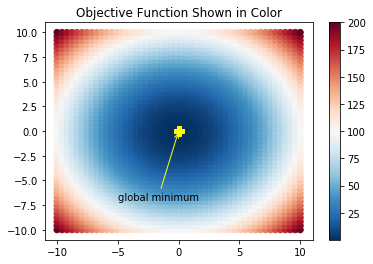

In [7]:
def visualize_fw():
    xcoord = np.linspace(-10.0,10.0,50)
    ycoord = np.linspace(-10.0,10.0,50)
    w1,w2 = np.meshgrid(xcoord,ycoord)
    pts = np.vstack((w1.flatten(),w2.flatten()))
    
    # All 2D points on the grid
    pts = pts.transpose()
    
    # Function value at each point
    f_vals = np.sum(pts*pts,axis=1)
    function_plot(pts,f_vals)
    plt.title('Objective Function Shown in Color')
    plt.show()
    return pts,f_vals

# Helper function to annotate a single point
def annotate_pt(text,xy,xytext,color):
    plt.plot(xy[0],xy[1],marker='P',markersize=10,c=color)
    plt.annotate(text,xy=xy,xytext=xytext,
                 # color=color,
                 arrowprops=dict(arrowstyle="->",
                 color = color,
                 connectionstyle='arc3'))

# Plot the function
# Pts are 2D points and f_val is the corresponding function value
def function_plot(pts,f_val):
    f_plot = plt.scatter(pts[:,0],pts[:,1],
                         c=f_val,vmin=min(f_val),vmax=max(f_val),
                         cmap='RdBu_r')
    plt.colorbar(f_plot)
    # Show the optimal point
    annotate_pt('global minimum',(0,0),(-5,-7),'yellow')    

pts,f_vals = visualize_fw()

In [ ]:
import numpy as np
import pandas as pd
 
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv')
y = data['sales']
X = np.column_stack((data['TV'], data['radio'],data['newspaper']))
 
inter = np.ones(X.shape[0])
X_new = np.column_stack((inter, X))

In [8]:
def soft_threshold(rho,lamda):
    '''Soft threshold function used for normalized data and lasso regression'''
    if rho < - lamda:
        return (rho + lamda)
    elif rho >  lamda:
        return (rho - lamda)
    else: 
        return 0
    

def coordinate_descent_lasso(theta,X,y,lamda = .01, num_iters=100, intercept = False):
    '''Coordinate gradient descent for lasso regression - for normalized data. 
    The intercept parameter allows to specify whether or not we regularize theta_0'''
    
    #Initialisation of useful values 
    m,n = X.shape
    X = X / (np.linalg.norm(X,axis = 0)) #normalizing X in case it was not done before
    
    #Looping until max number of iterations
    for i in range(num_iters): 
        
        #Looping through each coordinate
        for j in range(n):
            
            #Vectorized implementation
            X_j = X[:,j].reshape(-1,1)
            y_pred = X @ theta
            rho = X_j.T @ (y - y_pred  + theta[j]*X_j)
        
            #Checking intercept parameter
            if intercept == True:  
                if j == 0: 
                    theta[j] =  rho 
                else:
                    theta[j] =  soft_threshold(rho, lamda)  

            if intercept == False:
                theta[j] =  soft_threshold(rho, lamda)   
            
    return theta.flatten()

In [38]:
def func(x):
    return -x[0] + 1.4 * x[1] - np.exp(1) ** (0.01 * x[0] ** 2 + 0.11 * x[1] ** 2)

SyntaxError: invalid syntax (<ipython-input-38-0aa2a2731e36>, line 2)

In [39]:
y = [-10, 10]
minimize(func, y, method='CG')


C:\Users\Dotsenko.Semen\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  
C:\Users\Dotsenko.Semen\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\optimize\optimize.py:663: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
C:\Users\Dotsenko.Semen\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  
C:\Users\Dotsenko.Semen\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\optimize\optimize.py:663: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]


     fun: -162730.79141900383
     jac: array([  32549.96679688, -358059.15429688])
 message: 'Desired error not necessarily achieved due to precision loss.'
    nfev: 448
     nit: 0
    njev: 109
  status: 2
 success: False
       x: array([-10.,  10.])

In [33]:
minimize(func, y, method='Powell', tol=0.0001)

C:\Users\Dotsenko.Semen\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  
C:\Users\Dotsenko.Semen\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\optimize\optimize.py:2308: RuntimeWarning: invalid value encountered in double_scalars
  w = xb - ((xb - xc) * tmp2 - (xb - xa) * tmp1) / denom
C:\Users\Dotsenko.Semen\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\optimize\optimize.py:1926: RuntimeWarning: invalid value encountered in double_scalars
  tmp1 = (x - w) * (fx - fv)
C:\Users\Dotsenko.Semen\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\optimize\optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
C:\Users\Dotsenko.Semen\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\optimize\optimize.py:2573: RuntimeWarning: invalid value encountered in double_scalars
  if (fx2 - fval) > delta:


   direc: array([[1., 0.],
       [0., 1.]])
     fun: -inf
 message: 'Optimization terminated successfully.'
    nfev: 34
     nit: 1
  status: 0
 success: True
       x: array([-517.36668488,    7.58792896])

In [26]:
x_list = [(x, x)  for x in y]
[func(x) for x in x_list]

[-22.085536923187664,
 -18.085536923187664,
 -72.7886282920231,
 -16643.644729445583]

In [6]:
func(9)

TypeError: 'int' object is not subscriptable

In [ ]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
 
# Creating dataset
x = np.outer(np.linspace(-3, 3, 32), np.ones(32))
y = x.copy().T # transpose
z = (np.sin(x ** 2) + np.cos(y ** 2) )
 
# Creating figure
fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')
 
# Creating plot
ax.plot_surface(x, y, z)
 
# show plot
plt.show()

In [45]:
np.random.shuffle(lst)
lst

array([-5,  3, -4,  4,  0,  5, -1, -2,  1,  2, -3])

In [44]:
lst = np.arange(-5,6)